In [5]:
from keras.layers import Input,Lambda, Dense, Flatten

In [6]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [30]:
#paths to the train, validation and test image datasets 
train_path = '/content/drive/MyDrive/dataset/Garbage-classification/'
valid_path = '/content/drive/MyDrive/dataset/Garbage-classification/'

# extract images to training set by applying data preprocessing and data augmentation
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1)

train_set = train_datagen.flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_datagen = ImageDataGenerator(validation_split=0.1)

valid_set = valid_datagen.flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [31]:
IMAGE_SIZE = [224,224]

In [32]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3],weights = 'imagenet',include_top=False)

In [33]:
for layer in vgg.layers:
    layer.trainable = False

In [34]:
folders = glob('/content/drive/MyDrive/dataset/Garbage-classification/*')

In [35]:
x = Flatten()(vgg.output)

In [36]:
prediction = Dense(len(folders),activation='softmax')(x)

In [37]:
model = Model(inputs = vgg.input,outputs=prediction)

In [38]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [45]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
             metrics = ['accuracy'])

In [46]:
r = model.fit_generator(
  train_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(train_set),
  validation_steps=len(valid_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
143/143 [==============================] - 588s 4s/step - loss: 13.3996 - accuracy: 0.5234 - val_loss: 8.1308 - val_accuracy: 0.7490
Epoch 2/5
143/143 [==============================] - 44s 304ms/step - loss: 6.2084 - accuracy: 0.7668 - val_loss: 10.6412 - val_accuracy: 0.7570
Epoch 3/5
143/143 [==============================] - 43s 303ms/step - loss: 5.9305 - accuracy: 0.8113 - val_loss: 11.7992 - val_accuracy: 0.7530
Epoch 4/5
143/143 [==============================] - 44s 305ms/step - loss: 5.6711 - accuracy: 0.8224 - val_loss: 10.1182 - val_accuracy: 0.7968
Epoch 5/5
143/143 [==============================] - 44s 305ms/step - loss: 5.6269 - accuracy: 0.8522 - val_loss: 12.3614 - val_accuracy: 0.7769


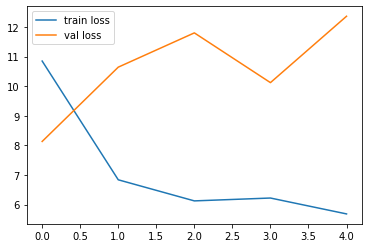

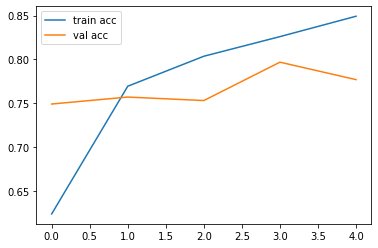

<Figure size 432x288 with 0 Axes>

In [49]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
